<h1>Постановка задачи</h1>

Определить множество W всех населенных пунктов с числом жителей свыше 20 тыс. человек, которые входят в состав Пермского края, кроме г. Перми. В четырех элементах получившегося множества (в четырех из этих пунктов) необходимо виртуально расположить объекты обслуживания населения. При этом размещение объектов должно быть оптимальным с точки зрения минимизации расстояния от каждого элемента множества Wдо искомых объектов.
Уровни сложности (от самого простого до самого сложного)?

<ol>
<li>В качестве расстояния между населенными пунктами понимать евклидово расстояние между их центрами (центры можно определить приблизительно)</li>
    <ul>
    <li>Описание алгоритма решения задачи</li>
    <li>Создание программного кода, который выводить решение задачи в виде искомого списка населенных пунктов</li>
    </ul>
<br>
<li>В качестве расстояния между населенными пунктами понимать расстояние между ними с учетом дорожного графа</li>
    <ul>
    <li>Описание алгоритма решения задачи</li>
    <li>Создание программного кода, который выводить решение задачи в виде искомого списка населенных пунктов</li>
    </ul>
</ol>

<h1>Решение задачи</h1>

Для решения задачи, возьмем данные с [сайта](http://www.statdata.ru/naselenie/permskogo-kraya) о численности городов Пермского края на 27.10.2015.

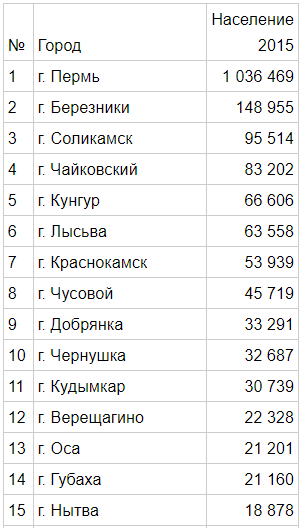

Имеем 14 населенных пунктов с численностью более 20 тыс. человек, остается 13, если исключить г. Пермь. Отметим эти города на карте Пермского края:

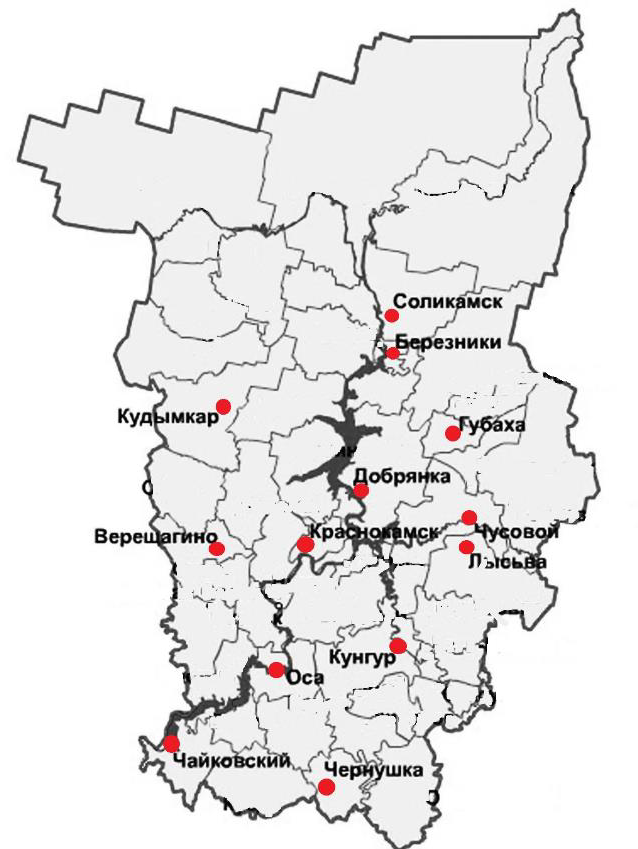

Зафиксируем начало координат в г. Добрянка, так как этот город находится примерно в центре и найдем примерные координаты других городов в условных единицах с учетом выбранного начала координат.

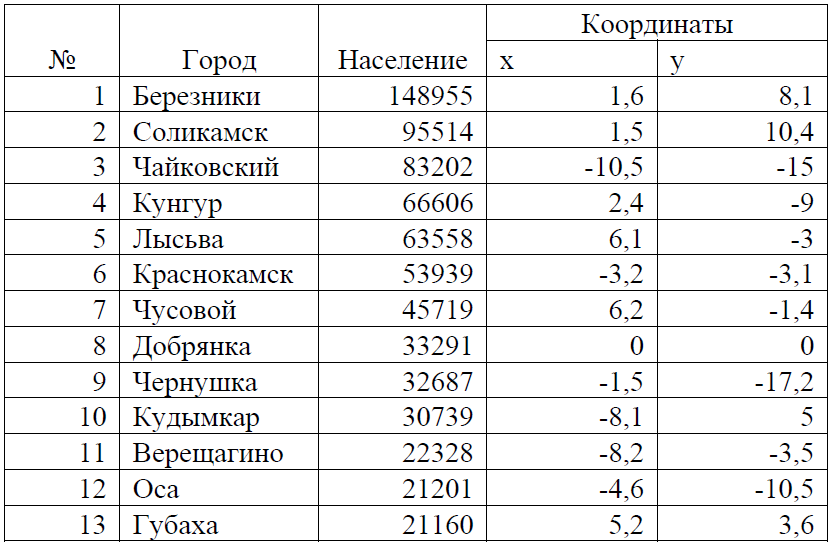

# 1 часть

В качестве метода решения задачи можно применить метод k – средних. Данный метод применяется в задачах кластеризации. Действие алгоритма таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров:

$$V = \sum^k_{i=1}\sum^{}_{x \in \mathbf{S_i\\}}\,(x-\mu_i)^2$$

где 𝑘 – число кластеров, $𝑆_𝑖$ – полученные кластеры $𝑖=1,2,…,𝑘$, а $\mu_i$ – центры масс всех векторов 𝑥 из кластеров $𝑆_𝑖$. 

Для данного алгоритма предполагается, что количество кластеров уже известно, данное условие подходит для нашей задачи, так как мы знаем количество городов, в которых требуется разместить объекты обслуживания населения.

**Идея**: Поделить города на 4 сегмента и для каждого из них найти с помощью алгоритма центры этих сегментов. Найденные центры будут точками на плоскости. Чтобы разместить центры в конкретных городах возьмем наименьшее расстояние от найденного центра в сегменте и отнесем этот центр в ближайший город.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import scipy.spatial as ss
import networkx as nx
%matplotlib inline
plt.rcParams["figure.figsize"] = (6, 8)

In [35]:
df = pd.DataFrame([['Березники', 1.6, 8.1]
                      , ['Соликамск', 1.5, 10.4]
                      , ['Чайковский', -10.5, -15]
                      , ['Кунгур', 2.4, -9]
                      , ['Лысьва', 6.1, -3]
                      , ['Краснокамск', -3.2, -3.1]
                      , ['Чусовой', 6.2, -1.4]
                      , ['Добрянка', 0, 0]
                      , ['Чернушка', -1.5, -17.2]
                      , ['Кудымкар', -8.1, 5]
                      , ['Верещагино', -8.2, -3.5]
                      , ['Оса', -4.6, -10.5]
                      , ['Губаха', 5.2, 3.6]], columns=['city', 'x', 'y'])

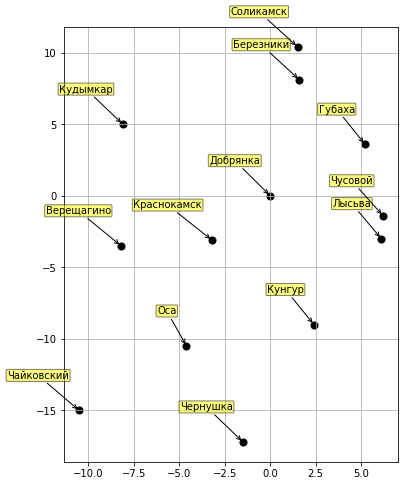

In [36]:
plt.scatter(df.x, df.y, s=50, color='Black')

for label, x, y in zip(df.city, df.x, df.y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 30),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.grid()

In [37]:
# Введем количество объектов обслуживания
number_of_Cities = 4

Испльзуем **метод k-средних**. В результате реализации алгоритма имеем:
<ul>
    <li> <b>y_kmeans</b> - индексы полученных сегментов, на которые будут разделены города </li>
    <li> <b>center</b> - координаты центров сегментов </li>
</ul>

In [38]:
kmeans = KMeans(n_clusters=number_of_Cities)
kmeans.fit(df[['x', 'y']].values)
y_kmeans = kmeans.predict(df[['x', 'y']].values)
centers = kmeans.cluster_centers_

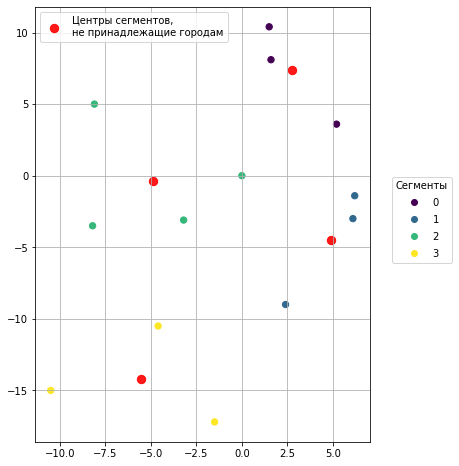

In [136]:
fig, ax = plt.subplots()
scatter1 = ax.scatter(df.x, df.y, c=y_kmeans, s=40)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Сегменты", bbox_to_anchor=(1.05, 0.4))

ax.add_artist(legend1)
scatter2 = ax.scatter(centers[:, 0], centers[:, 1], 
                      c='red', s=70, alpha=0.9, label='Центры сегментов,\nне принадлежащие городам')
legend2 = ax.legend()
ax.grid()

In [144]:
# Введем матрицу расстояний
rasst_matrix = ss.distance.cdist(df[['x','y']].values, centers, 'euclidean')
ras_df = pd.DataFrame(rasst_matrix, index = df.city)

# Найдем минимальное расстояние от центра кластера на плоскости до ближайшего города
ras_df = ras_df[ras_df.isin(ras_df.min().values)].replace({np.nan:0})
res = df.loc[np.nonzero(ras_df.values)[0]]

print('Центры нужно расположить в городах:\n%s' % (', '.join(res.city.values)))

Центры нужно расположить в городах:
Березники, Лысьва, Краснокамск, Оса


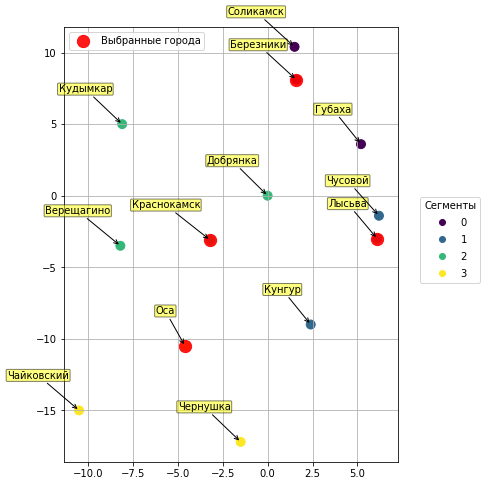

In [145]:
fig, ax = plt.subplots()
scatter1 = ax.scatter(df.x, df.y, c=y_kmeans, s=80)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Сегменты", bbox_to_anchor=(1.05, 0.4))

ax.add_artist(legend1)
scatter2 = ax.scatter(res.x, res.y, c='red', s=150, alpha=0.9, label='Выбранные города')
legend2 = ax.legend()

for label, x, y in zip(df.city, df.x, df.y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 30),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ax.grid()

**Вывод**: Визуальный анализ подтверждает правильность работы алгоритма. Так же такую задачу можно решить методами линейного программирования.

# 2 часть

В данной части задания следует учитывать дорожный граф, алгоритм представленный в решении задания 1.1 не подходит. Смоделируем дорожный граф, а именно, добавим промежуточные узлы (точки Point1…Point16) на карту.

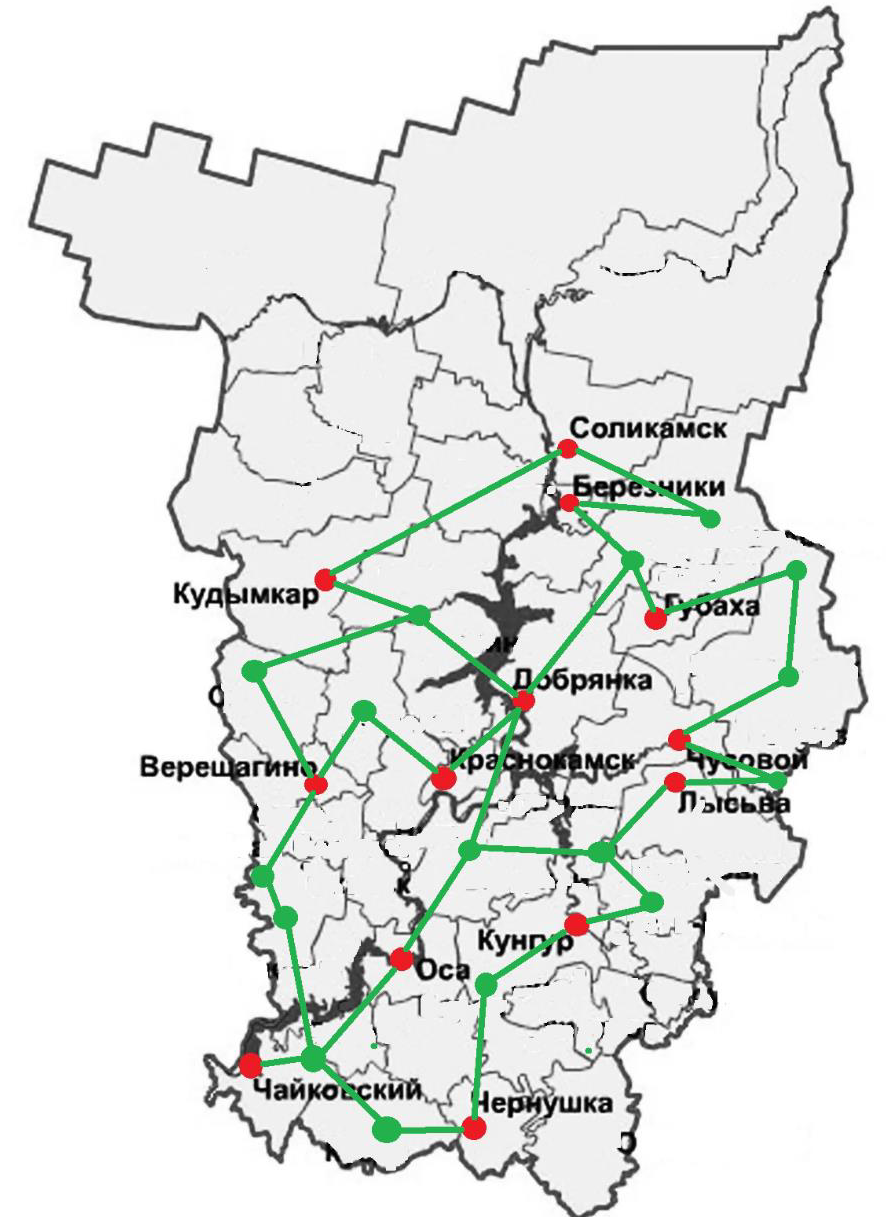

**Рассуждение**: имеем дело с взвешенным неориентированным графом с неотрицательными весами ребер. Поиск оптимального расположения объектов в таком графе напоминает задачу о p-медиане. Задача о p-медиане принадлежит классу NP-трудных, поскольку к ней сводится задача о вершинном покрытии, что и требует наша задача.

**Описание алгоритма**: Задача о p-медиане заключается в размещении p объектов обслуживания из множества I таким образом, чтобы минимизировать транспортные затраты (в нашем случае расстояния).

In [2]:
# Инициализируем дорожный граф
df = pd.DataFrame([['Березники', 1.6, 8.1]
                      , ['Соликамск', 1.5, 10.4]
                      , ['Чайковский', -10.5, -15]
                      , ['Кунгур', 2.4, -9]
                      , ['Лысьва', 6.1, -3]
                      , ['Краснокамск', -3.2, -3.1]
                      , ['Чусовой', 6.2, -1.4]
                      , ['Добрянка', 0, 0]
                      , ['Чернушка', -1.5, -17.2]
                      , ['Кудымкар', -8.1, 5]
                      , ['Верещагино', -8.2, -3.5]
                      , ['Оса', -4.6, -10.5]
                      , ['Губаха', 5.2, 3.6]
                      , ['Point1', -4.5, 4.5]
                      , ['Point2', 6, 8]
                      , ['Point3', 4, 6.2]
                      , ['Point4', 9.8, 6]
                      , ['Point5', 9, 1]
                      , ['Point6', 15, -2.5]
                      , ['Point7', 3, -5.4]
                      , ['Point8', 5, -7]
                      , ['Point9', -1, -11]
                      , ['Point10', -5, -17]
                      , ['Point11', -8, -15]
                      , ['Point12', -9, -9]
                      , ['Point13', -15, -8]
                      , ['Point14', -11, 0]
                      , ['Point15', -6, 0]
                      , ['Point16', -2, -5]], columns=['city', 'x', 'y'])

In [3]:
# Введем матрицу расстояний
rasst_matrix = ss.distance.cdist(df[['x','y']].values, df[['x','y']].values, 'euclidean')
ras_df = pd.DataFrame(rasst_matrix, index=df.city, columns=df.city)

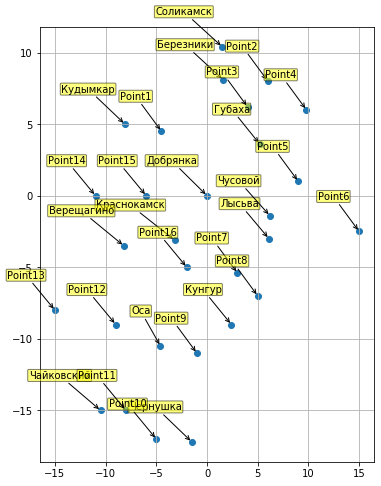

In [6]:
plt.scatter(df.x, df.y)

for label, x, y in zip(df.city, df.x, df.y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 30),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
plt.grid()

In [59]:
# Сформируем связи согласно дорожного графа
edges = np.array([[0,0,1,1,2,3,3,4,4,5,5,6,6,7,7,7,7,8,8,9,9,10,10,10,11,11,12,12,13,13,13,14,14,15,15,15,16,
                   16,17,17,18,18,19,19,19,20,20,21,21,22,22,23,23,23,23,24,24,25,25,26,26,27,27,28,28,28],
                  [14,15,9,14,23,20,21,18,19,7,27,17,18,5,13,15,28,21,22,1,13,25,26,27,23,28,15,16,7,9,26,0,
                   1,0,7,12,12,17,6,16,4,6,4,20,28,3,19,3,8,8,23,11,22,23,24,23,25,10,24,10,13,5,10,7,11,19]])

mask = np.ones(rasst_matrix.shape, bool)
mask[edges[0],edges[1]] = False
rasst_matrix[mask] = 0
G = nx.from_numpy_matrix(rasst_matrix, parallel_edges=True)

pos = nx.spring_layout(G, k=0.5)
labels = {e: round(G.edges[e]['weight']) for e in G.edges}

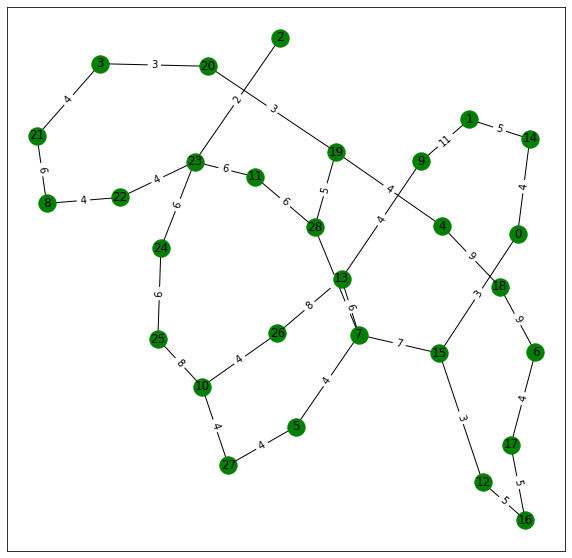

In [74]:
# Визуализируем граф G
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, with_labels=True, node_color='Green')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [61]:
# Напишем алгоритм поиска p-медианы
costs = []
for facility in G.nodes():
    sum = 0
    for customer in G.nodes():
        if (customer != facility):
            distance = nx.shortest_path_length(G, customer, facility, 'length')
            sum = sum + distance
    costs.append((sum, facility))

In [73]:
# введем функцию BestCities на вход которой приходит требуемое количество объектов обслуживания
def BestCities(x):
    sp = []
    for i in df.city[:13].index:
        for j in costs:
            if (i == j[1]):
                sp.append(j)
    sp.sort()
    best = [i[1] for i in sp]
    best = best[1:x + 1]
    return ', '.join(df.loc[best].city.values)

# Вызовем заданную ранее функцию для поиска 4 объектов
BestCities(4)

'Оса, Краснокамск, Лысьва, Губаха'

**Вывод**: Визуальный анализ подтверждает правильность работы алгоритма. Так же такую задачу можно решить методами линейного программирования.